In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [240]:
df=pd.read_csv("data/StudentPerformanceFactors.csv")

In [241]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [242]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [243]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

In [244]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [245]:
print(df['Teacher_Quality'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Distance_from_Home'].unique())

['Medium' 'High' 'Low' nan]
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]


In [246]:
print(df['Teacher_Quality'].value_counts())
print("_______________________________")
print(df['Parental_Education_Level'].value_counts())
print("_______________________________")
print(df['Distance_from_Home'].value_counts())

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
_______________________________
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
_______________________________
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


In [247]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [248]:
df[numerical_cols].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


In [249]:
for col in categorical_cols:
    print(df[col].value_counts())
    print("_______________________________")

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
_______________________________
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
_______________________________
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
_______________________________
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
_______________________________
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
_______________________________
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
_______________________________
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64
_______________________________
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
_______________________________
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: in

In [250]:
# from sklearn.preprocessing import LabelEncoder

# label_cols = ['Parental_Involvement', 'Access_to_Resources','Parental_Education_Level','Distance_from_Home',
#               'Motivation_Level','Family_Income','Teacher_Quality', 'Peer_Influence', ]
# for col in label_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)

In [251]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,1,0,0,...,1,1,0,1,0,1,0,0,1,1
1,19,64,8,59,2,4,61,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,24,98,7,91,2,4,74,0,1,0,...,1,1,1,0,0,0,1,0,1,1
3,29,89,8,98,1,4,71,1,0,0,...,1,1,0,0,0,1,0,1,0,1
4,19,92,6,65,3,4,70,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [252]:
from sklearn.model_selection import train_test_split

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
numerical_cols.remove('Exam_Score')

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings("ignore")

# Define models
models = {
    'catboost': CatBoostRegressor(verbose=0),
    'adaboost': AdaBoostRegressor()
}

# Define parameter grids
params = {
    'catboost': {
        'model__iterations': [100, 150,200],
        'model__learning_rate': [0.01, 0.1],
        'model__depth': [5, 7, 8, 9],
        'model__l2_leaf_reg': [1, 3]
    },
    'adaboost': {
        'model__n_estimators': [150,160,170,180,190,200],
        'model__learning_rate': [0.01, 0.1,1,1.2],
        'model__estimator': [DecisionTreeRegressor(max_depth=3), 
                            Ridge(alpha=0.21),
                            Ridge(alpha=0.22),
                            Ridge(alpha=0.23),
                            Ridge(alpha=0.24),      
                            Ridge(alpha=0.25),
                            Ridge(alpha=0.26),
                            Ridge(alpha=0.27),
                            LinearRegression()]
                }
}
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_cols)],
    remainder='passthrough'
)

best_model = None
best_score = float('-inf')
best_model_name = None

for name, model in models.items():
    print(f"Training {name}...")
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    param_grid = params.get(name, {})

    grid = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    # Compare score
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_model_name = name
        best_params = grid.best_params_

print(f"\nBest Model: {best_model_name}")
print(f"Best R2 Score: {best_score:.4f}")
print("Best Parameters:", best_params)


Training catboost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training adaboost...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Model: adaboost
Best R2 Score: 0.7230
Best Parameters: {'model__estimator': Ridge(alpha=0.23), 'model__learning_rate': 1, 'model__n_estimators': 180}


In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.51
MSE: 3.32
RMSE: 1.82
R² Score: 0.77


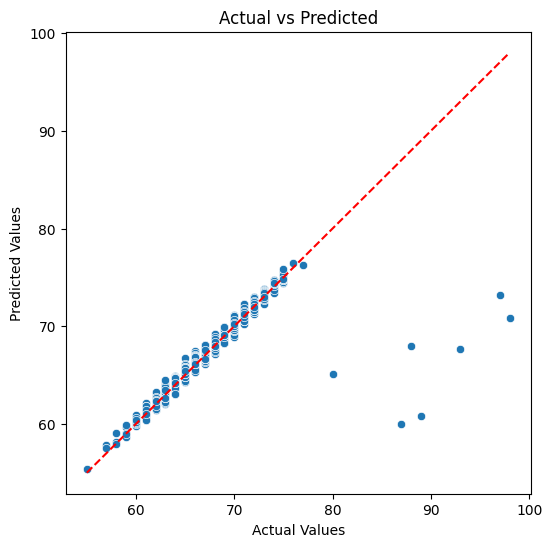

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


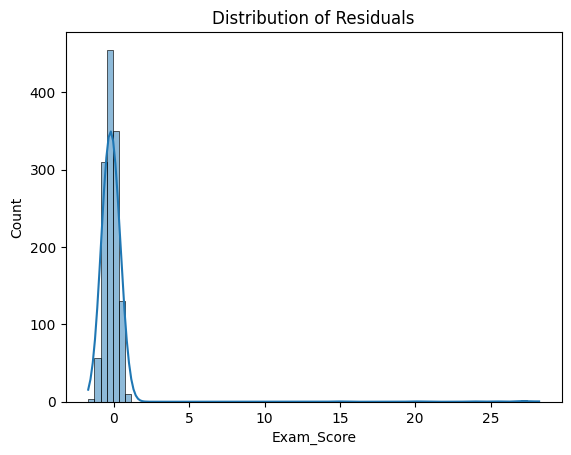

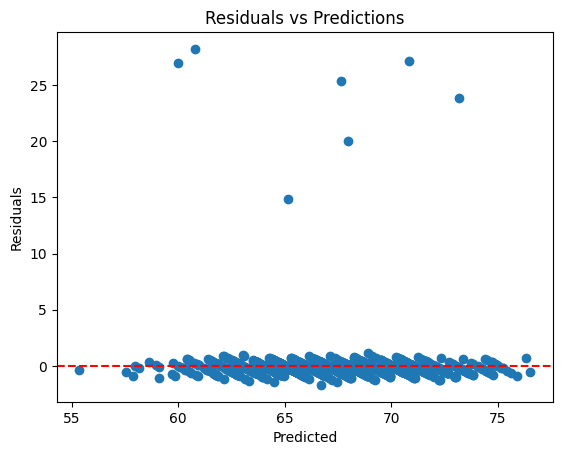

In [257]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
